In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib



In [5]:
# Load the dataset to inspect its structure
file_path = "/workspaces/BankMarketingPredictor-LogisticRegression/data/bank_marketing_campaign_data.csv"
bank_data = pd.read_csv(file_path)

# Display the first few rows and the column names to understand the data structure
print(bank_data.head())
print(bank_data.columns)

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [6]:
# Create a SQLite database in memory and load the data into a table
conn = sqlite3.connect(':memory:')  # Using in-memory database for simplicity
cursor = conn.cursor()

In [7]:
# Write the DataFrame to a SQL table named 'bank_marketing'
bank_data.to_sql('bank_marketing', conn, index=False, if_exists='replace')

# Verify by fetching the first few rows from the database
query_result = pd.read_sql_query("SELECT * FROM bank_marketing LIMIT 10;", conn)
print(query_result)

# Checking for missing values in each column of the dataset
missing_values = bank_data.isnull().sum()
print(missing_values[missing_values > 0])

   age          job  marital            education  default housing loan  \
0   56    housemaid  married             basic.4y       no      no   no   
1   57     services  married          high.school  unknown      no   no   
2   37     services  married          high.school       no     yes   no   
3   40       admin.  married             basic.6y       no      no   no   
4   56     services  married          high.school       no      no  yes   
5   45     services  married             basic.9y  unknown      no   no   
6   59       admin.  married  professional.course       no      no   no   
7   41  blue-collar  married              unknown  unknown      no   no   
8   24   technician   single  professional.course       no     yes   no   
9   25     services   single          high.school       no     yes   no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  telephone   may         mon  ...         1    999         0  nonexistent   
1  telephone   m

<Figure size 1000x600 with 0 Axes>

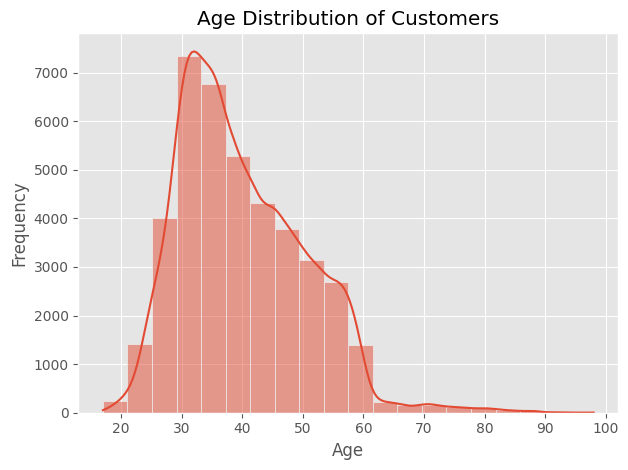

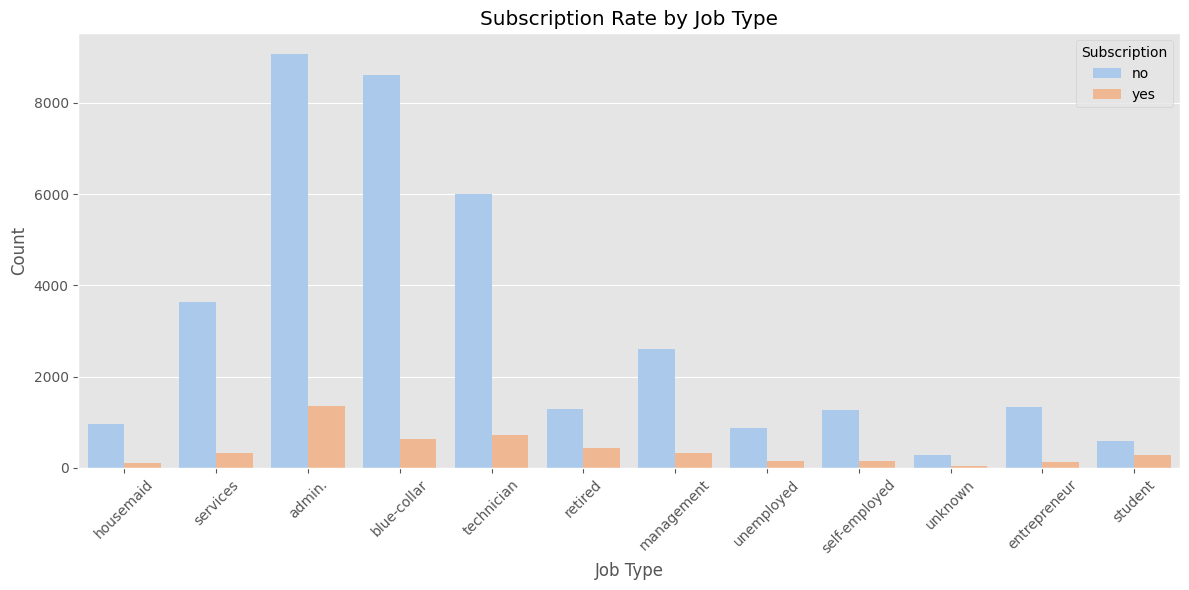

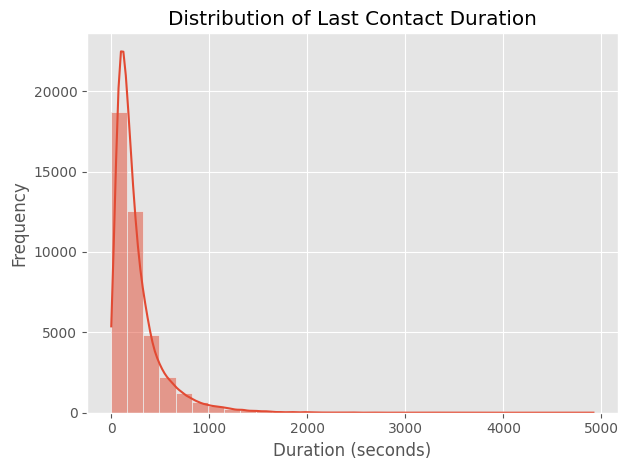

/tmp/ipykernel_120225/1305252579.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=poutcome_data, x='poutcome', palette='viridis')


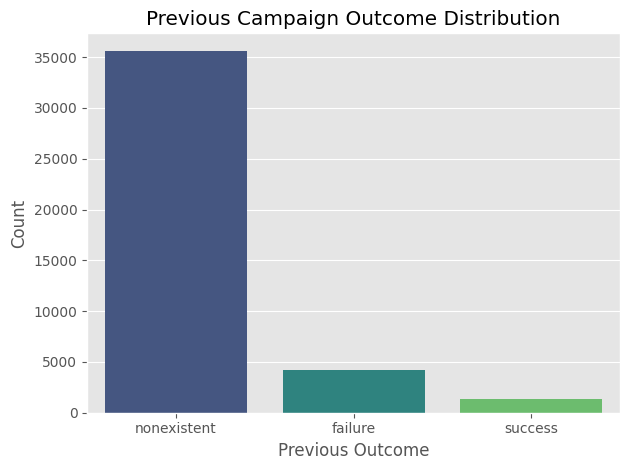

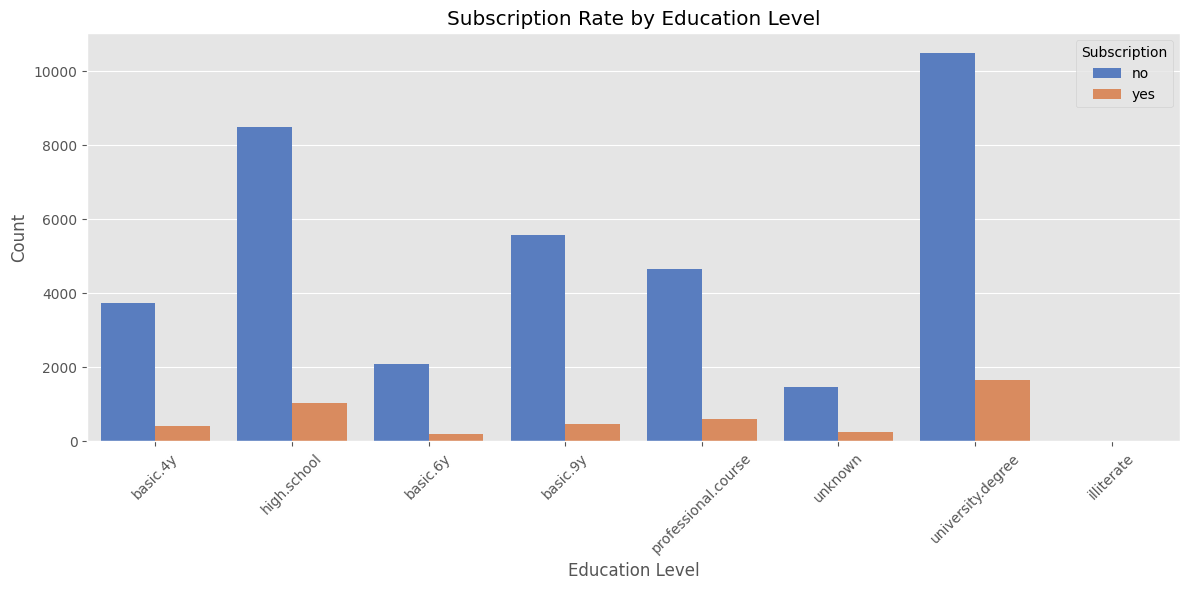

/tmp/ipykernel_120225/1305252579.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=duration_day_data, x='day_of_week', y='avg_duration', palette='cool')


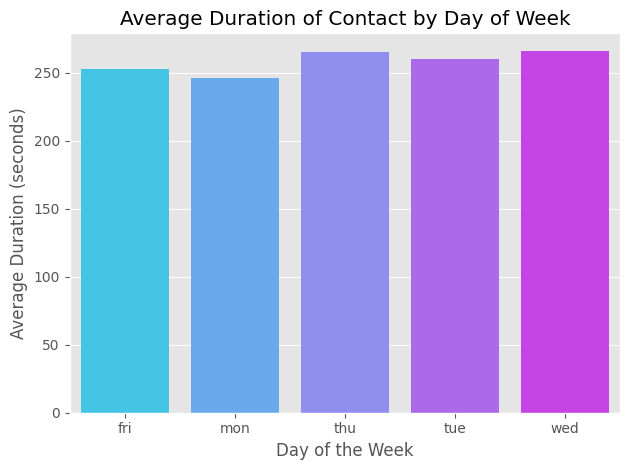

    cid          name  type  notnull dflt_value  pk
0     0           age   INT        0       None   0
1     1           job  TEXT        0       None   0
2     2       marital  TEXT        0       None   0
3     3     education  TEXT        0       None   0
4     4       contact  TEXT        0       None   0
5     5         month  TEXT        0       None   0
6     6      duration   INT        0       None   0
7     7      campaign   INT        0       None   0
8     8      previous   INT        0       None   0
9     9      poutcome  TEXT        0       None   0
10   10  emp.var.rate  REAL        0       None   0
11   11     euribor3m  REAL        0       None   0
12   12   nr.employed  REAL        0       None   0
13   13             y  TEXT        0       None   0
   age        job  marital    education    contact month  duration  campaign  \
0   56  housemaid  married     basic.4y  telephone   may       261         1   
1   57   services  married  high.school  telephone   may    

In [8]:
# Set up matplotlib styling
plt.style.use('ggplot')
plt.figure(figsize=(10, 6))

# Query data for visualizations from the SQL database
# 1. Distribution of Age
age_data = pd.read_sql_query("SELECT age FROM bank_marketing;", conn)
plt.figure()
sns.histplot(age_data['age'], bins=20, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 2. Subscription Rate by Job Type
job_subscription_data = pd.read_sql_query("SELECT job, y FROM bank_marketing;", conn)
plt.figure(figsize=(12, 6))
sns.countplot(data=job_subscription_data, x='job', hue='y', palette='pastel')
plt.title("Subscription Rate by Job Type")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Subscription")
plt.tight_layout()
plt.show()

# 3. Duration of Last Contact
duration_data = pd.read_sql_query("SELECT duration FROM bank_marketing;", conn)
plt.figure()
sns.histplot(duration_data['duration'], bins=30, kde=True)
plt.title("Distribution of Last Contact Duration")
plt.xlabel("Duration (seconds)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# 4. Previous Campaign Outcome
poutcome_data = pd.read_sql_query("SELECT poutcome FROM bank_marketing;", conn)
plt.figure()
sns.countplot(data=poutcome_data, x='poutcome', palette='viridis')
plt.title("Previous Campaign Outcome Distribution")
plt.xlabel("Previous Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 5. Subscription Rate by Education Level
education_subscription_data = pd.read_sql_query("SELECT education, y FROM bank_marketing;", conn)
plt.figure(figsize=(12, 6))
sns.countplot(data=education_subscription_data, x='education', hue='y', palette='muted')
plt.title("Subscription Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Subscription")
plt.tight_layout()
plt.show()

# 6. Average Duration of Contact by Day of Week
duration_day_data = pd.read_sql_query("SELECT day_of_week, AVG(duration) as avg_duration FROM bank_marketing GROUP BY day_of_week;", conn)
plt.figure()
sns.barplot(data=duration_day_data, x='day_of_week', y='avg_duration', palette='cool')
plt.title("Average Duration of Contact by Day of Week")
plt.xlabel("Day of the Week")
plt.ylabel("Average Duration (seconds)")
plt.tight_layout()
plt.show()

# Remove less relevant columns from the SQL table
columns_to_remove = ["day_of_week", "default", "housing", "loan", "pdays", "cons.price.idx", "cons.conf.idx"]
columns_to_keep = [col for col in bank_data.columns if col not in columns_to_remove]
columns_str = ", ".join([f'"{col}"' if '.' in col else col for col in columns_to_keep])

# Create the reduced table with filtered columns
cursor.execute(f"CREATE TABLE bank_marketing_reduced AS SELECT {columns_str} FROM bank_marketing;")
reduced_table_info = pd.read_sql_query("PRAGMA table_info(bank_marketing_reduced);", conn)
reduced_sample_data = pd.read_sql_query("SELECT * FROM bank_marketing_reduced LIMIT 5;", conn)
print(reduced_table_info)
print(reduced_sample_data)


In [9]:
# Drop the renamed table if it already exists
cursor.execute("DROP TABLE IF EXISTS bank_marketing_reduced_renamed;")

# Create the final table with column renaming
cursor.execute("""
    CREATE TABLE bank_marketing_reduced_renamed AS
    SELECT 
        age,
        job,
        marital,
        education,
        contact,
        month,
        duration,
        campaign,
        previous,
        poutcome,
        "emp.var.rate" AS employment_rate_variation,
        euribor3m AS euribor_3_month,
        "nr.employed" AS number_employed,
        y
    FROM bank_marketing_reduced;
""")

In [10]:
renamed_sample_data = pd.read_sql_query("SELECT * FROM bank_marketing_reduced_renamed;", conn)
print(renamed_sample_data)

# Convert columns to categorical using pd.Categorical and encode them
categorical_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in categorical_columns:
    renamed_sample_data[col] = pd.Categorical(renamed_sample_data[col]).codes

# Define features and target
features = renamed_sample_data.drop(columns=['y'])
target = renamed_sample_data['y'].map({'no': 0, 'yes': 1})


       age          job  marital            education    contact month  \
0       56    housemaid  married             basic.4y  telephone   may   
1       57     services  married          high.school  telephone   may   
2       37     services  married          high.school  telephone   may   
3       40       admin.  married             basic.6y  telephone   may   
4       56     services  married          high.school  telephone   may   
...    ...          ...      ...                  ...        ...   ...   
41183   73      retired  married  professional.course   cellular   nov   
41184   46  blue-collar  married  professional.course   cellular   nov   
41185   56      retired  married    university.degree   cellular   nov   
41186   44   technician  married  professional.course   cellular   nov   
41187   74      retired  married  professional.course   cellular   nov   

       duration  campaign  previous     poutcome  employment_rate_variation  \
0           261         1       

In [11]:
# PCA for economic and campaign features
economic_features = ['employment_rate_variation', 'euribor_3_month', 'number_employed']
campaign_features = ['duration', 'campaign', 'previous']

# Apply PCA and add results as new columns
pca_economic = PCA(n_components=1)
features['economic_pca'] = pca_economic.fit_transform(features[economic_features])

pca_campaign = PCA(n_components=1)
features['campaign_pca'] = pca_campaign.fit_transform(features[campaign_features])

# Drop original economic and campaign features
features.drop(columns=economic_features + campaign_features, inplace=True)

# Standardize the dataset
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
joblib.dump(scaler, 'scaler.pkl')
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [16]:
features_scaled.shape[1]
# Check feature names used in StandardScaler
print("Feature names expected by scaler:", scaler.feature_names_in_)


Feature names expected by scaler: ['age' 'job' 'marital' 'education' 'contact' 'month' 'poutcome'
 'economic_pca' 'campaign_pca']


In [13]:
# Train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# Predictions and evaluation
y_pred_smote = log_reg.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Output evaluation results
print("Accuracy with SMOTE:", accuracy_smote)
print("Confusion Matrix with SMOTE:\n", conf_matrix_smote)
print("Classification Report with SMOTE:\n", class_report_smote)

Accuracy with SMOTE: 0.8500849720806021
Confusion Matrix with SMOTE:
 [[6184 1119]
 [ 116  819]]
Classification Report with SMOTE:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91      7303
           1       0.42      0.88      0.57       935

    accuracy                           0.85      8238
   macro avg       0.70      0.86      0.74      8238
weighted avg       0.92      0.85      0.87      8238



In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train logistic regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_smote, y_train_smote)
joblib.dump(log_reg, 'logistic_regression_model.pkl')

# Predictions and evaluation
y_pred_smote = log_reg.predict(X_test)

# Accuracy and classification report
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Output evaluation results
print("Accuracy with SMOTE:", accuracy_smote)
print("Confusion Matrix with SMOTE:\n", conf_matrix_smote)
print("Classification Report with SMOTE:\n", class_report_smote)

# Create a DataFrame to compare predictions with actual values
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_smote
})

# Display the first few rows of the comparison
print("\nComparison of Actual vs. Predicted values:")
print(comparison_df.head())


NameError: name 'LogisticRegression' is not defined